In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ideal points model visualization

In [40]:
# read data
# from data/votes/input_2019
senator_map = np.loadtxt('senator_map.txt', dtype=str, delimiter=',')
# from data/votes/output_2019
ideal_point_loc = np.load('ideal_point_loc.npy')
polarity_loc = np.load('polarity_loc.npy')
popularity_loc = np.load('popularity_loc.npy')

In [41]:
# convert to df
df_ip = pd.DataFrame({'name': senator_map, 'ideal_point': ideal_point_loc})
df_ip[['name', 'party']] = df_ip['name'].str.split(' \(', n=1, expand=True)
df_ip.loc[:, 'party'] = df_ip['party'].str.rstrip(')')

Text(0.5, 1.0, 'Ideal points by party')

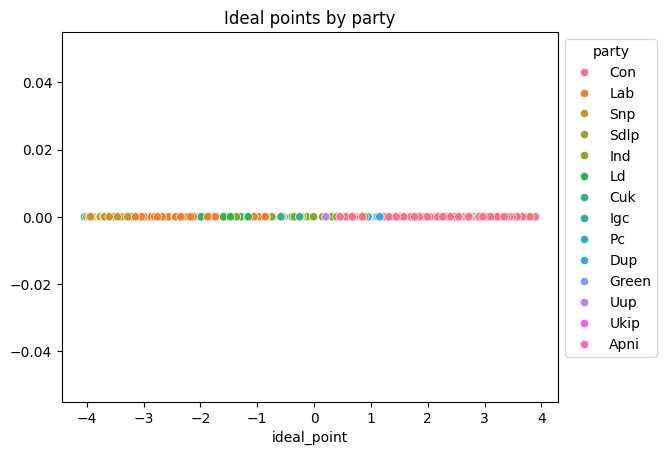

In [5]:
# plot all ideal points by party
fig, ax = plt.subplots(1,1)

ax = sns.scatterplot(x='ideal_point', y=[0]*len(df_ip), data=df_ip, hue='party')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
ax.set_title('Ideal points by party')

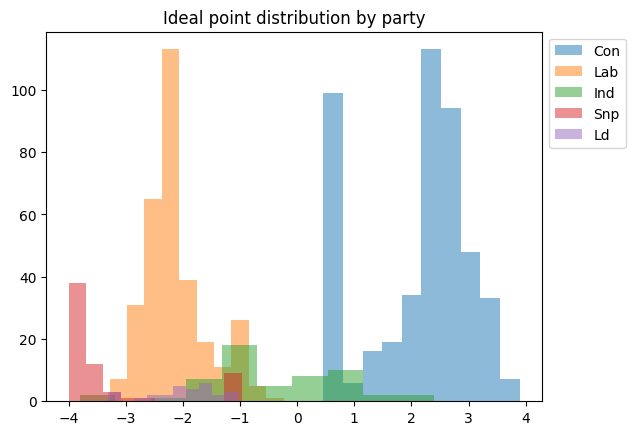

In [6]:
# plot distribution of main parties
main_parties = ['Con', 'Lab', 'Ind', 'Snp', 'Ld']

for i, party in enumerate(main_parties):
  plt.hist(df_ip[df_ip['party']==party]['ideal_point'], alpha=0.5, label=party)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Ideal point distribution by party')
plt.show()

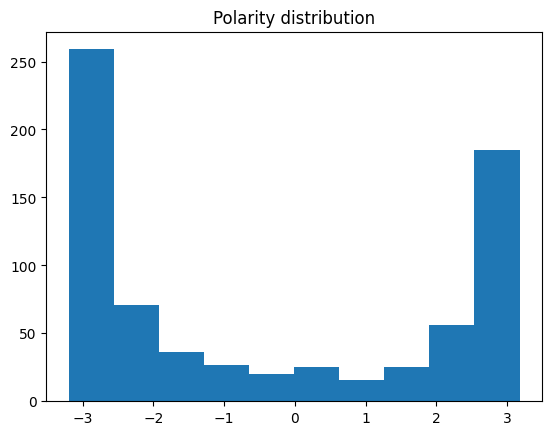

In [7]:
# plot distribution of polarity
plt.hist(polarity_loc)
plt.title('Polarity distribution')
plt.show()

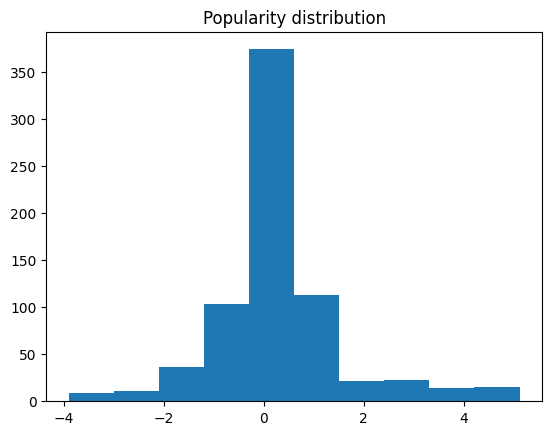

In [8]:
# plot distribution of popularity
plt.hist(popularity_loc)
plt.title('Popularity distribution')
plt.show()

# TBIP model visualization

In [42]:
authors = pd.read_csv('authors.csv')

In [43]:
authors.drop(columns='Unnamed: 0', inplace=True)
authors['name'] = authors['name'].str.replace('\n', '')
authors[['name', 'party']] = authors['name'].str.split(' \(', n=1, expand=True)
authors.loc[:, 'party'] = authors['party'].str.rstrip(')')

# Evaluation of TBIP against IP

In [44]:
df_ip.loc[df_ip['party']=='Ind', 'party'] = 'Independent'
df_ip.loc[df_ip['party']=='Ld', 'party'] = 'Libdem'
df_ip.loc[df_ip['party']=='Cuk', 'party'] = 'Change Uk'
df_ip.loc[df_ip['party']=='Pc', 'party'] = 'Plaidcymru'
df_ip.loc[df_ip['party']=='Green', 'party'] = 'Gpew'

In [51]:
authors.set_index(['name', 'party'], inplace=True)
df_ip.set_index(['name', 'party'], inplace=True)

In [52]:
comparison = authors.join(df_ip, on=['name', 'party'], how='inner', lsuffix='_tbip', rsuffix='_ip')

In [65]:
# members of parliament lost (from text data)
set_final = set(comparison.index.get_level_values(0))
set_original = set(authors.index.get_level_values(0))
print(set_original.difference(set_final))

{'Steven Baker', 'Ian Lucas', 'Jo Johnson', 'Ed Vaizey', 'Nicholas Boles', 'Vincent Cable', 'Daniel Poulter', 'Stewart Mcdonald', 'Andrew Slaughter', 'Sylvia Eileen Paisley', 'Steve Pound', 'Gareth R Thomas', 'Ed Miliband', 'Bob Neill', 'John Martin Mcdonnell', 'Jon Ashworth', 'David Davies', 'Charles Hendry', 'Therese Coffey', 'Nicholas Dakin', 'Bill Cash', 'Angus Macneil'}


In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print(f"Mean squared error: {mean_squared_error(comparison['ideal_point_ip'], comparison['ideal_point_tbip'], squared=False):.4f}")
print(f"R2 score: {r2_score(comparison['ideal_point_ip'], comparison['ideal_point_tbip']):.4f}")

Mean squared error: 2.5529
R2 score: 0.0012


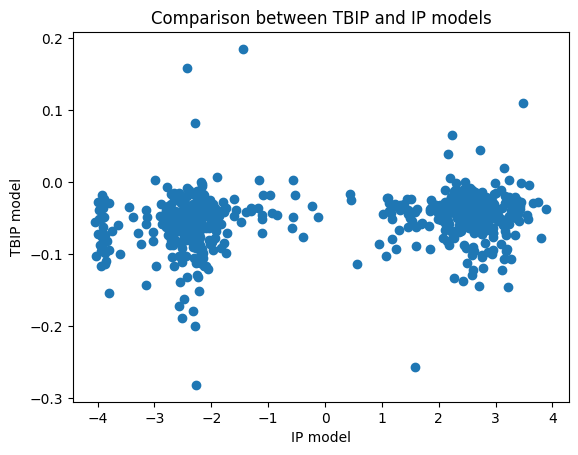

In [77]:
plt.scatter(comparison['ideal_point_ip'], comparison['ideal_point_tbip'])
plt.title('Comparison between TBIP and IP models')
plt.xlabel('IP model')
plt.ylabel('TBIP model')
plt.show()